In [29]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from PIL import Image
from torchvision.datasets import DatasetFolder
import torchvision
from tqdm.notebook import tqdm as tqdm
from torchsampler import ImbalancedDatasetSampler
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
# from tsne_torch import TorchTSNE as TSNE
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.decomposition import NMF

In [2]:
# train_path = "/home/chisc/workspace/wuzhenrong/galaxy/unsuper/images_gz2/"
train_path = "/home/chisc/workspace/wuzhenrong/galaxy/three_final/train/"

In [3]:
batch_size = 100
train_trans = transforms.Compose([transforms.Resize((255, 255)),transforms.ToTensor()])
train_data = ImageFolder(train_path, transform=train_trans)
train_loader = DataLoader(train_data, batch_size=batch_size, sampler=ImbalancedDatasetSampler(train_data))


In [4]:
# images, labels = next(iter(train_loader))

# for i in np.arange(3):
#     print(labels[i])
#     plt.figure(i)
#     plt.imshow(images[i].permute(1, 2, 0))
#     plt.show()

In [21]:
color = ['red', 'blue', 'black', 'orange', 'green', 'pink', 'purple', 'gray', 'brown', 'lightblue']
def show2d(x, y, mode):
    print(len(x))
    plt.title(mode)
    for i in range(len(x)):
        plt.scatter(x[i][0], x[i][1], color=color[y[i]])
    plt.show()
def show3d(x, y, mode):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    plt.title(mode)
    for i in range(len(x)):
        plt.scatter(x[i], x[i], x[i], color=color[y[i]])
    plt.show()

100


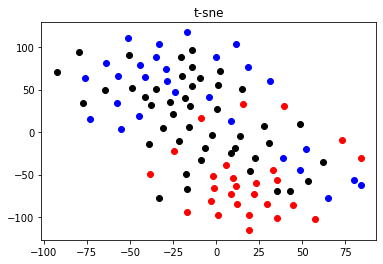

/home/chisc/.pyenv/versions/torch/lib/python3.8/site-packages/matplotlib/collections.py:1003: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


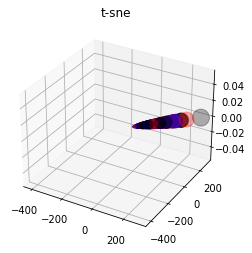

In [23]:
d2 = []
d3 = []
for x, y in train_loader:
    x = x.flatten(start_dim=1, end_dim=3)
    x = torch.squeeze(x)
    X_emb = TSNE(n_components=2, perplexity=30, n_iter=1000).fit_transform(x)
    Y_emb = TSNE(n_components=3, perplexity=30, n_iter=1000).fit_transform(x)
    d2.append(X_emb)
    d3.append(Y_emb)
    show2d(d2[0], y, 't-sne')
    show3d(d3[0], y, 't-sne')
    break

torch.Size([100, 3, 255, 255])
100
100


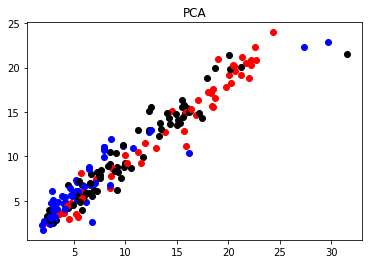

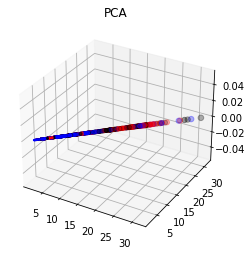

In [24]:
for x, y in train_loader:
    x = torch.squeeze(x)
    print(x.shape)
    print(len(x))
    i_2d = []
    i_3d = []
    for i in range(len(x)):
        i_2d.append(torch.pca_lowrank(x[i], q=2)[1].numpy())
    for i in range(len(x)):
        i_3d.append(torch.pca_lowrank(x[i], q=3)[1].numpy())
#     print(i_2d)
    show2d(i_2d, y, 'PCA')
    show3d(i_3d, y, 'PCA')
    break

100


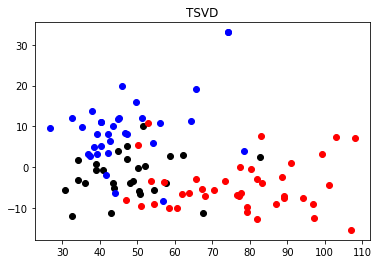

/home/chisc/.pyenv/versions/torch/lib/python3.8/site-packages/matplotlib/collections.py:1003: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


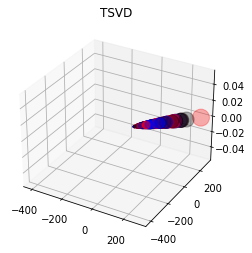

In [28]:
d2 = []
d3 = []
for x, y in train_loader:
    x = x.flatten(start_dim=1, end_dim=3)
    x = torch.squeeze(x)
    X_emb = TruncatedSVD(n_components=2, n_iter=1000).fit_transform(x)
    X_emb = TruncatedSVD(n_components=3, n_iter=1000).fit_transform(x)
    d2.append(X_emb)
    d3.append(Y_emb)
    show2d(d2[0], y, 'TSVD')
    show3d(d3[0], y, 'TSVD')
    break

/home/chisc/.pyenv/versions/torch/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 100 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


100


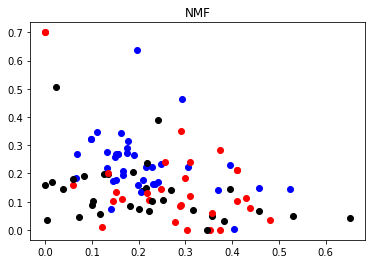

/home/chisc/.pyenv/versions/torch/lib/python3.8/site-packages/matplotlib/collections.py:1003: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


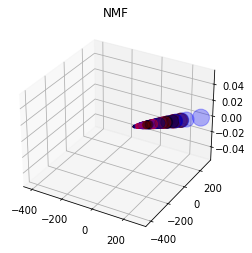

In [34]:
d2 = []
d3 = []
for x, y in train_loader:
    x = x.flatten(start_dim=1, end_dim=3)
    x = torch.squeeze(x)
    X_emb = NMF(n_components=2, max_iter=1000, init='random', random_state=0).fit_transform(x)
    X_emb = NMF(n_components=3, max_iter=100, init='random', random_state=0).fit_transform(x)
    d2.append(X_emb)
    d3.append(Y_emb)
    show2d(d2[0], y, 'NMF')
    show3d(d3[0], y, 'NMF')
    break